In [1]:
import ast
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from collections import defaultdict
from os.path import join
from comm_data import PreprocessedCommData

import sys
sys.path.append("..")

from seal.trainer.communication import *

In [2]:
paths = [
    join("..", "out", "data", "FedRL", "grid-3x3", "new_ranked.csv"),
    join("..", "out", "data", "MARL",  "grid-3x3", "new_ranked.csv"),
    join("..", "out", "data", "SARL",  "grid-3x3", "new_ranked.csv")
]
df = pd.concat([pd.read_csv(path) for path in paths])
df.reset_index(inplace=True)

pre_df = PreprocessedCommData.preprocess(df, ranked=True)
pre_df.head()

,round,timesteps_total,trainer,ranked,episode_reward_mean,comm_type,comm_cost
0,1,8000,FedRL,True,-24.393555,edge-to-tls-policy-comms,1
1,1,8000,FedRL,True,-24.393555,edge-to-tls-policy-comms,1
2,1,8000,FedRL,True,-24.393555,edge-to-tls-policy-comms,1
3,1,8000,FedRL,True,-24.393555,edge-to-tls-policy-comms,1
4,1,8000,FedRL,True,-24.393555,edge-to-tls-policy-comms,1


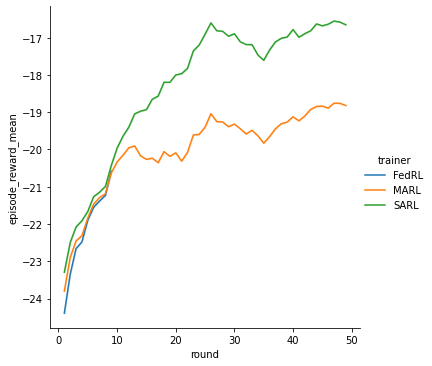

In [3]:
sns.relplot(data=pre_df, kind="line", x="round", y="episode_reward_mean", hue="trainer")
plt.show()

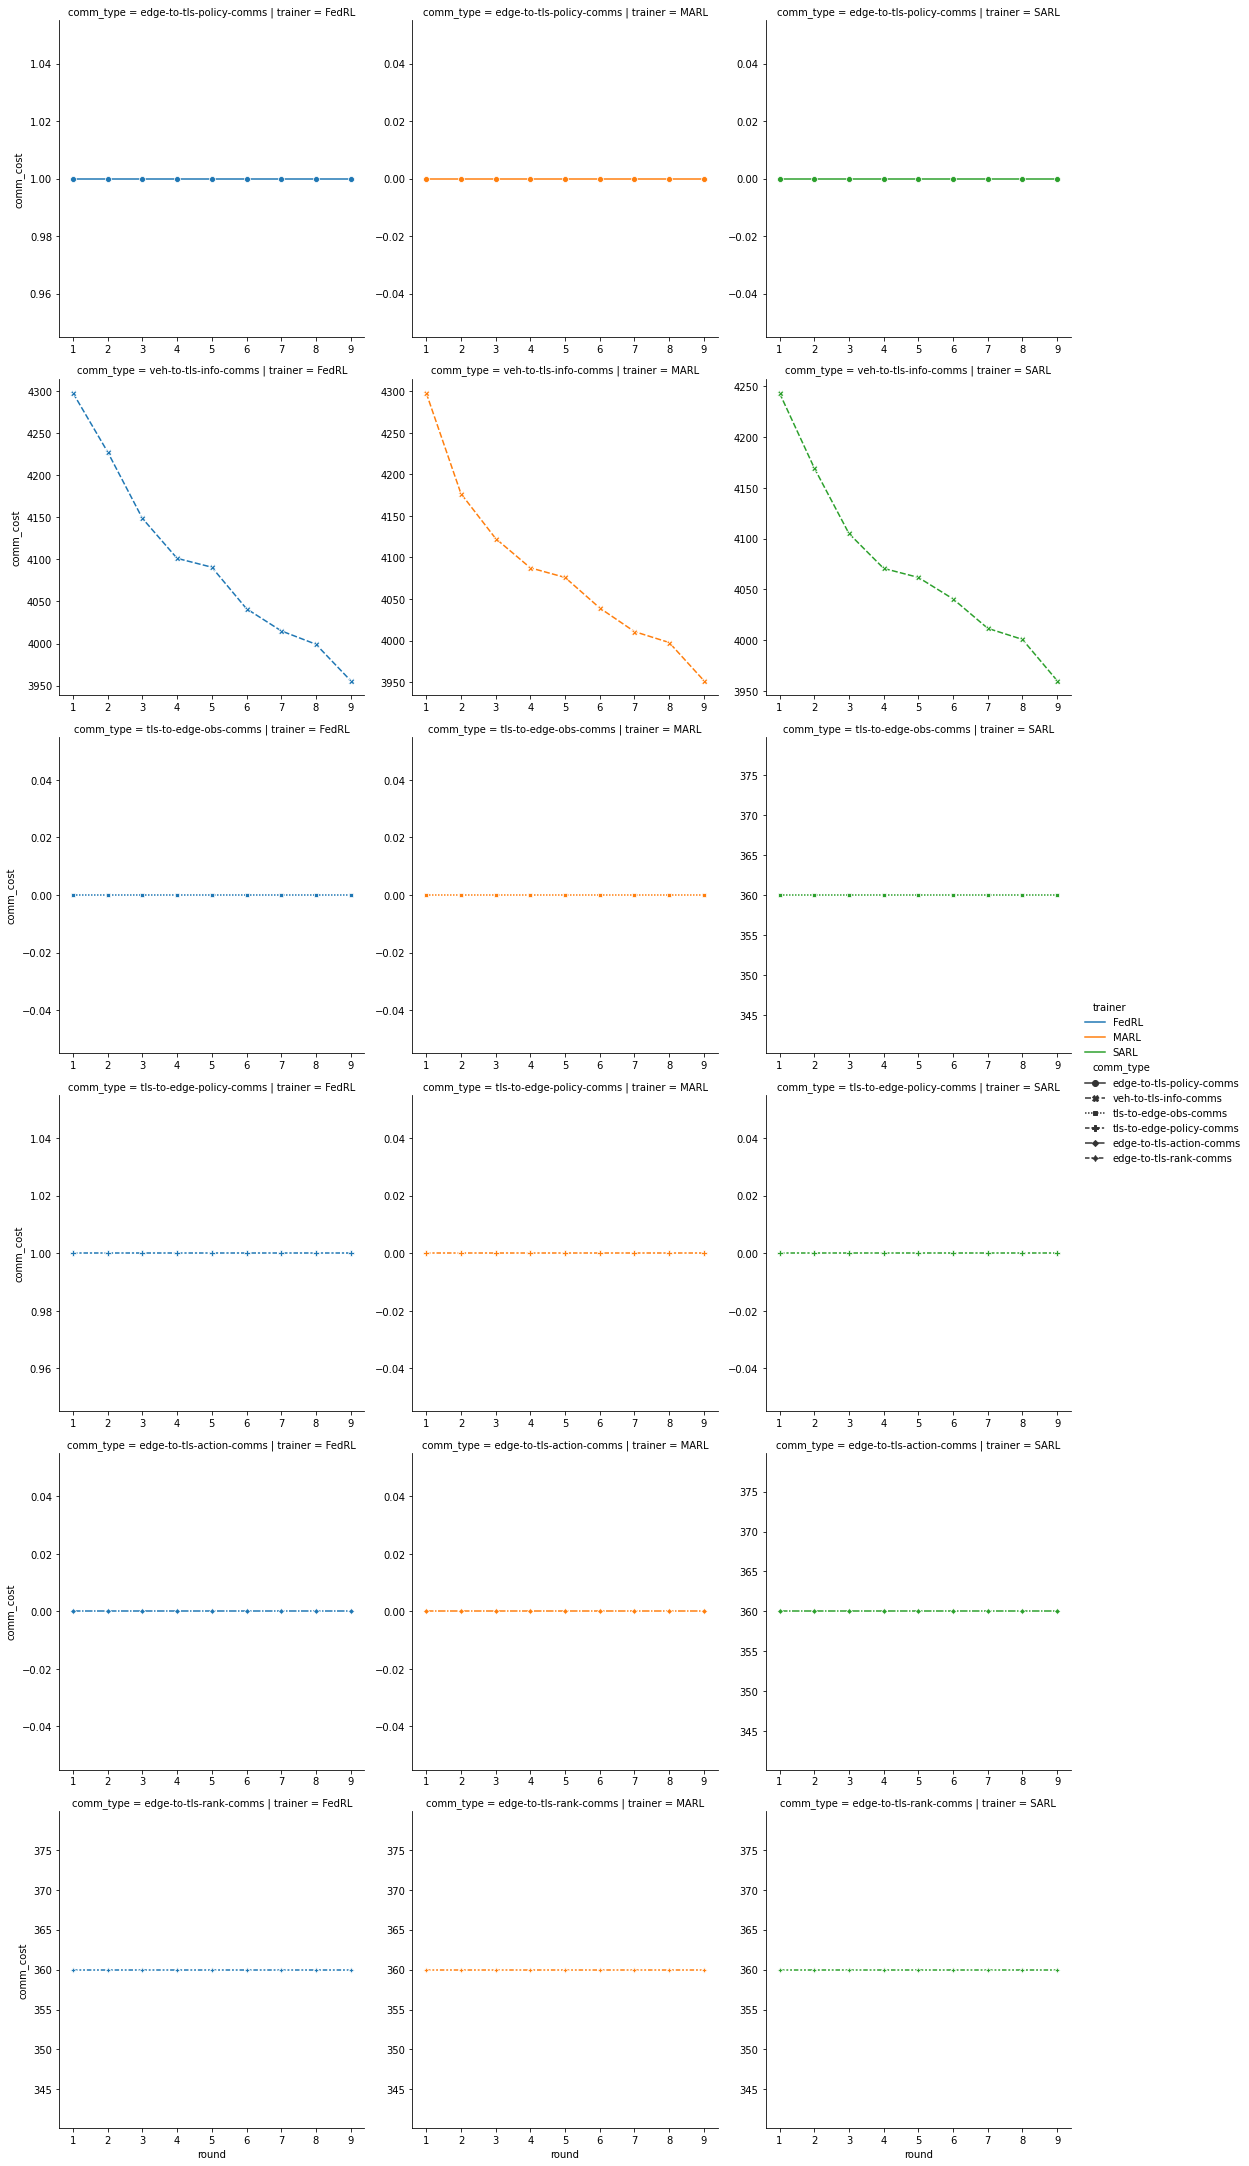

In [5]:
sns.relplot(
    data=pre_df.query("round < 10"), 
    kind="line", 
    x="round", 
    y="comm_cost", 
    style="comm_type", 
    row="comm_type", 
    col="trainer",
    hue="trainer",
    markers=True,
    facet_kws={"sharex": False, "sharey": False},
    ci=None
)
plt.show()